**🔹 Step 1: Import necessary libraries and dataset**


In [1]:
import os
os.listdir("/kaggle/input")


['uci-credit-card-dataset']

In [2]:
import os
os.listdir("/kaggle/input/uci-credit-card-dataset")


['UCI_Credit_Card.csv']

In [3]:
import pandas as pd

# Load dataset from Kaggle input folder
import pandas as pd

df = pd.read_csv("/kaggle/input/uci-credit-card-dataset/UCI_Credit_Card.csv")
# Display first rows
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**🔹 Step 2: Preprocessing & EDA**

**1. Explore the dataset**

In [4]:
# Shape and info
print(df.shape)
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


(30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2          

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

👉 This tells us if the dataset has missing values, datatypes, and how many rows/cols.

**2. Define features & target**

In this dataset:


* Target column = default.payment.next.month (0 = no default, 1 = default)
* All other columns = features


In [5]:
X = df.drop(columns=["ID", "default.payment.next.month"])  # Features
y = df["default.payment.next.month"]  # Target


**3. Train-test split**

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**4. Scale features**

Neural Networks work better with normalized values.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**🔹 Step 3: Build a Neural Network for Credit Risk Prediction**

We’ll use TensorFlow/Keras.

**1. Import libraries**

In [8]:
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or '3' to silence more logs

#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2025-09-15 11:00:53.716072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757934053.942543      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757934054.009636      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**2. Define the model**

A simple feedforward Neural Network:

In [10]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),   # prevent overfitting
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # output: probability of default
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-15 11:01:08.027294: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


**3. Compile the model**

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.AUC(name='auc')]
)


**4. Train the model**

In [12]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=256,
    verbose=1
)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7462 - auc: 0.5801 - loss: 0.5706 - val_accuracy: 0.8040 - val_auc: 0.6860 - val_loss: 0.4814
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8016 - auc: 0.6940 - loss: 0.4890 - val_accuracy: 0.8088 - val_auc: 0.7163 - val_loss: 0.4628
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8007 - auc: 0.7045 - loss: 0.4832 - val_accuracy: 0.8127 - val_auc: 0.7337 - val_loss: 0.4545
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8098 - auc: 0.7241 - loss: 0.4702 - val_accuracy: 0.8138 - val_auc: 0.7430 - val_loss: 0.4498
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8092 - auc: 0.7323 - loss: 0.4604 - val_accuracy: 0.8163 - val_auc: 0.7459 - val_loss: 0.4469
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8188 - auc: 0.7420 - loss: 0.4484 - val_accuracy: 0.8160 - val_auc: 0.7528 - val_loss: 0.4442
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

**5. Evaluate**

In [13]:
results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test AUC: {results[2]:.4f}")


Test Accuracy: 0.8213
Test AUC: 0.7688


**🔹 Step 4: Model Evaluation & Visualization**

To make your project resume-worthy, you need graphs + evaluation metrics.

**1. Plot training history (Loss & Accuracy)**

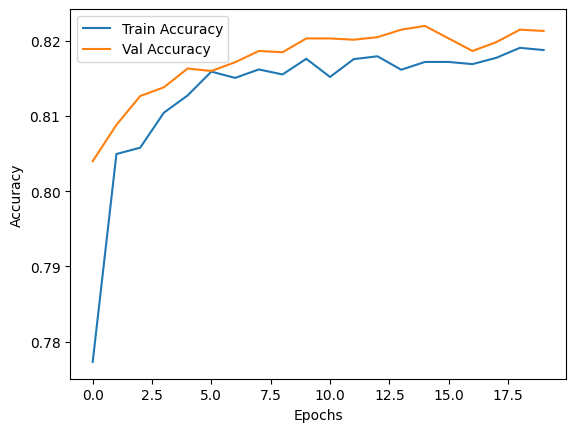

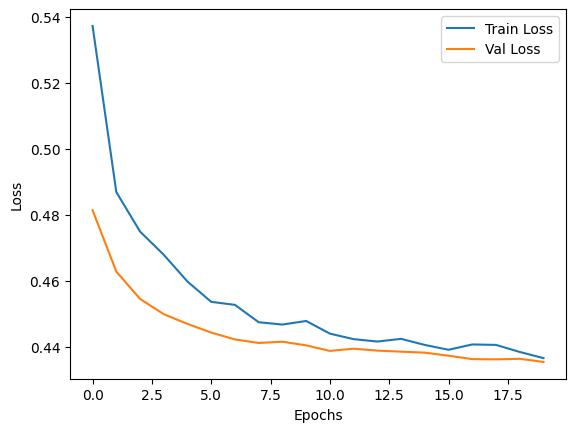

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**2. Confusion Matrix**

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


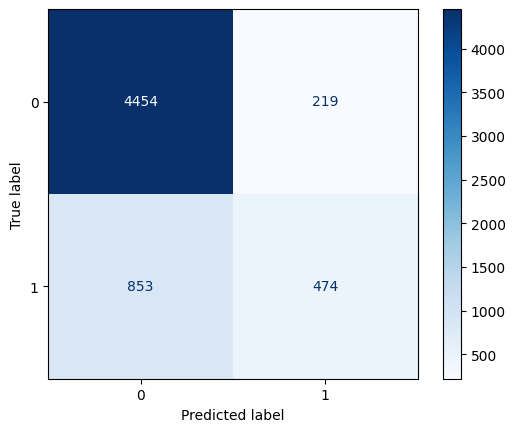

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predictions (probabilities → 0/1)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


**3. ROC Curve**

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step


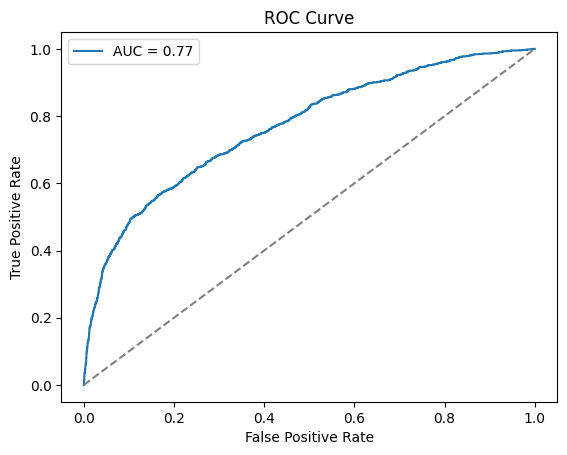

In [16]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**🔹 Step 5: Hyperparameter Tuning (Advanced)**

We’ll use KerasTuner for automated tuning of neurons, layers, learning rate, etc.

**1. Install and import KerasTuner**

In [17]:
!pip install keras-tuner --quiet

import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers


**2. Define a model builder function**

In [18]:
def model_builder(hp):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Input(shape=(X_train.shape[1],)))
    
    # Hidden layers (tune number of units: 32–256)
    for i in range(hp.Int('num_layers', 1, 3)):  
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
        model.add(layers.Dropout(rate=hp.Float('dropout_' + str(i),
                                               min_value=0.2,
                                               max_value=0.5,
                                               step=0.1)))
    
    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile (tune learning rate)
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc')]
    )
    
    return model


**3. Run Hyperparameter Search**

In [19]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_auc',
    max_trials=5,  # try more for deeper tuning
    executions_per_trial=1,
    directory='my_dir',
    project_name='credit_risk_tuning'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best units per layer: {best_hps.get('units_0')}
Best learning rate: {best_hps.get('learning_rate')}
""")


Trial 5 Complete [00h 00m 26s]
val_auc: 0.7666975855827332

Best val_auc So Far: 0.7692212462425232
Total elapsed time: 00h 01m 58s

Best units per layer: 32
Best learning rate: 0.0009629861008872285



**4. Train the best model**

In [20]:
best_model = tuner.hypermodel.build(best_hps)
history_best = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=256
)


Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7714 - auc: 0.5614 - loss: 0.5544 - val_accuracy: 0.8073 - val_auc: 0.6969 - val_loss: 0.4741
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8014 - auc: 0.7046 - loss: 0.4817 - val_accuracy: 0.8107 - val_auc: 0.7319 - val_loss: 0.4643
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8074 - auc: 0.7148 - loss: 0.4674 - val_accuracy: 0.8123 - val_auc: 0.7382 - val_loss: 0.4497
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8109 - auc: 0.7362 - loss: 0.4568 - val_accuracy: 0.8160 - val_auc: 0.7522 - val_loss: 0.4451
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8090 - auc: 0.7360 - loss: 0.4592 - val_accuracy: 0.8187 - val_auc: 0.7559 - val_loss: 0.4425
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8132 - auc: 0.7475 - loss: 0.4495 - val_accuracy: 0.8140 - val_auc: 0.7567 - val_loss: 0.4422
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step -

**🔹Step 6 — Evaluation & Calibration Code**

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
    confusion_matrix, classification_report, precision_score, f1_score, brier_score_loss
)
from sklearn.calibration import calibration_curve

In [22]:
# ---- Use best_model for evaluation ----
y_pred_proba = best_model.predict(X_test).ravel()
y_pred_class = (y_pred_proba >= 0.5).astype(int)

# ===== ROC-AUC =====
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)



188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


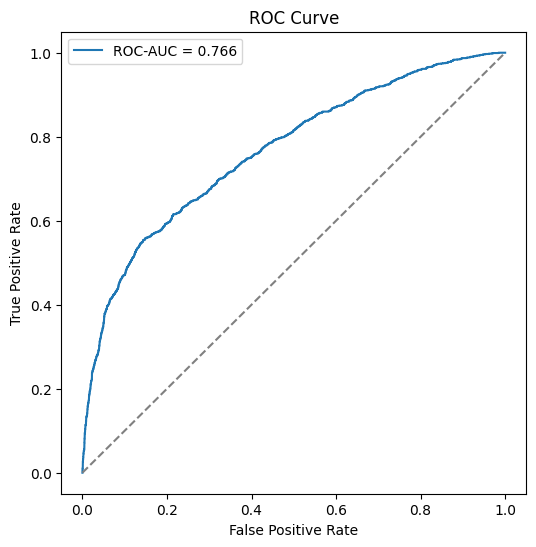

In [23]:

# ================== ROC-AUC ==================
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)   # <-- This defines fpr, tpr

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--',color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

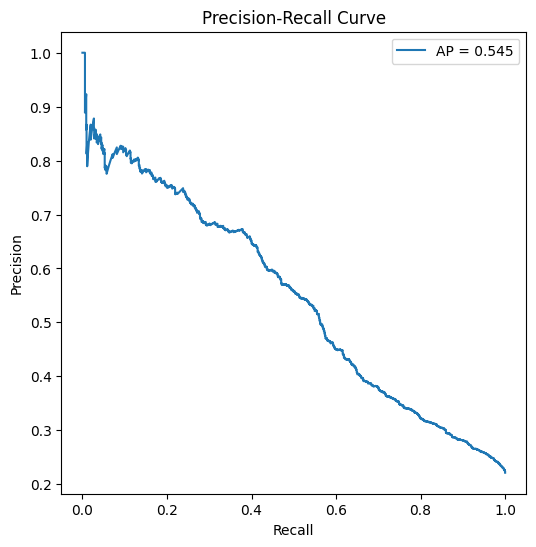

In [24]:
# ================== Precision-Recall ==================
avg_prec = average_precision_score(y_test, y_pred_proba)
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(rec, prec, label=f"AP = {avg_prec:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [25]:
# ================== Confusion Matrix & Report ==================
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))

# ================== Precision@k (top 10%) ==================
k = int(0.10 * len(y_pred_proba))
top_k_idx = np.argsort(y_pred_proba)[-k:]
precision_at_k = precision_score(y_test.iloc[top_k_idx], y_pred_class[top_k_idx])
print(f"Precision@10%: {precision_at_k:.3f}")

# ================== F1 Score ==================
f1 = f1_score(y_test, y_pred_class)
print(f"F1 Score: {f1:.3f}")


Confusion Matrix:
 [[4430  243]
 [ 831  496]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.37      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000

Precision@10%: 0.683
F1 Score: 0.480


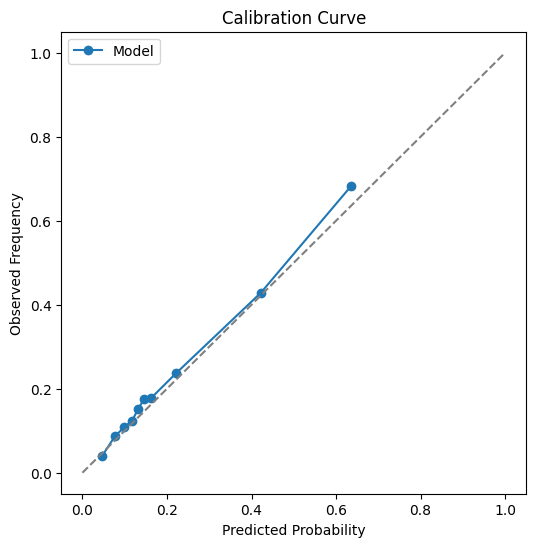

In [26]:
# ================== Calibration Curve ==================
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10, strategy='quantile')

plt.figure(figsize=(6,6))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequency')
plt.title('Calibration Curve')
plt.legend()
plt.show()

In [27]:
# ================== Brier Score ==================
brier = brier_score_loss(y_test, y_pred_proba)
print(f"Brier Score: {brier:.4f}")

Brier Score: 0.1371


**🔹Step 7 — SHAP Explainability Code**

📌 Before running, install SHAP once (if not installed):

In [28]:
!pip install shap --quiet


In [29]:
import shap
import tensorflow as tf
import numpy as np
import pandas as pd


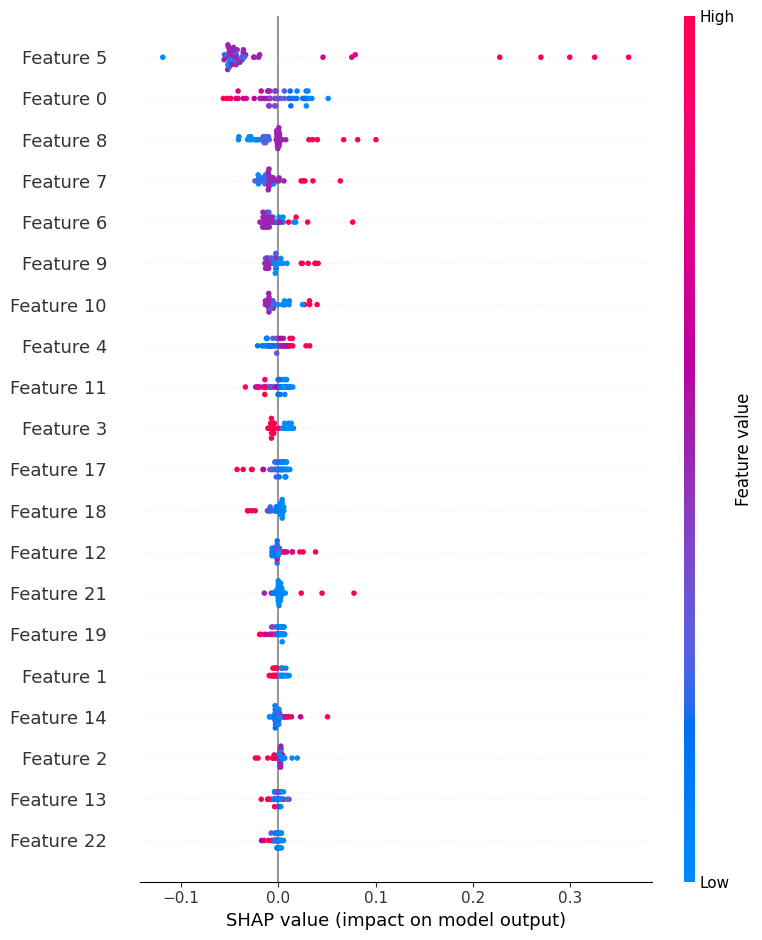

In [30]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Small background
idx_bg = np.random.choice(X_train.shape[0], 100, replace=False)
background = X_train[idx_bg]

# Auto-select the right explainer
explainer = shap.Explainer(model, background)

# Test samples
idx_test = np.random.choice(X_test.shape[0], 50, replace=False)
test_sample = X_test[idx_test]

# SHAP values
shap_values = explainer(test_sample)

# Plot
shap.summary_plot(shap_values, test_sample)


**🔹Step 8 — Save & Version the Model**

In [31]:
import joblib
import os

# Directory to store models
MODEL_DIR = "saved_models"
os.makedirs(MODEL_DIR, exist_ok=True)

# Define version (can be number or date-based)
version = "v1"  

# Filepath for saving
model_path = os.path.join(MODEL_DIR, f"credit_default_model_{version}.pkl")

# Save the model
joblib.dump(model, model_path)

print(f"✅ Model saved successfully at {model_path}")


✅ Model saved successfully at saved_models/credit_default_model_v1.pkl


In [32]:
# Save the model in HDF5 format
model.save("model.keras")  # adds .keras extension

# OR, SavedModel format
#model.save("saved_model/")


In [33]:
import joblib

# Save the trained model (Keras)
model.save("model.keras")  # or model.save("model.h5")

# Save the scaler if it exists
try:
    joblib.dump(scaler, "scaler.pkl")
    print("Scaler saved successfully.")
except NameError:
    print("No scaler found, skipping scaler save.")

# Save the encoder if it exists
try:
    joblib.dump(encoder, "encoder.pkl")
    print("Encoder saved successfully.")
except NameError:
    print("No encoder found, skipping encoder save.")

# Save the feature list if it exists
try:
    joblib.dump(feature_list, "feature_list.pkl")
    print("Feature list saved successfully.")
except NameError:
    print("No feature_list found, skipping save.")


Scaler saved successfully.
No encoder found, skipping encoder save.
No feature_list found, skipping save.


In [34]:
import joblib

# Save model
model.save("model.keras")  # or "model.h5"

# Save scaler if it exists
if 'scaler' in globals():
    joblib.dump(scaler, "scaler.pkl")

# Save feature list if it exists
if 'feature_list' in globals():
    joblib.dump(feature_list, "feature_list.pkl")


In [35]:
import joblib, json, os
from tensorflow import keras

os.makedirs('/kaggle/working/artifacts', exist_ok=True)

# Save model
best_model.save('/kaggle/working/artifacts/credit_model.h5')

# Save scaler
joblib.dump(scaler, '/kaggle/working/artifacts/scaler.gz')

# Save features list
FEATURES = [c for c in df.columns if c not in ['ID', 'default.payment.next.month']]
json.dump(FEATURES, open('/kaggle/working/artifacts/features_list.json', 'w'))

print("Artifacts saved in /kaggle/working/artifacts/")


Artifacts saved in /kaggle/working/artifacts/


In [36]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [37]:
print(model.input_shape)


(None, 23)
